<a href="https://colab.research.google.com/github/bernatm/ABDataChallengeExtension/blob/main/ConsumBarcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import libraries#

In [ ]:
import pandas as pd
from collections import Counter
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Exploratory Analysis##

In [ ]:
barcelona = pd.read_csv("/content/drive/MyDrive/TFG/Data AB/DOMESTIC/BARCELONA.csv")

In [ ]:
display(barcelona.tail())
barcelona.info()

,FECHA,USO,CONSUMO,ID_CONTADOR
10126881,2021-11-06,DOMÈSTIC,2219,17469
10126882,2021-11-02,DOMÈSTIC,74,8841
10126883,2021-11-07,DOMÈSTIC,27,8841
10126884,2021-11-07,DOMÈSTIC,206,18528
10126885,2021-11-03,DOMÈSTIC,80,18528


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10126886 entries, 0 to 10126885
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   FECHA        object
 1   USO          object
 2   CONSUMO      int64 
 3   ID_CONTADOR  int64 
dtypes: int64(2), object(2)
memory usage: 309.0+ MB


In [ ]:
#Datetime formatting
def date_formatting(data):
  data['FECHA'] = pd.to_datetime(data['FECHA'])
  data = data.set_index('FECHA')
  data = data.sort_index()
  return data

barcelona = date_formatting(barcelona)
barcelona.head()


,USO,CONSUMO,ID_CONTADOR
FECHA,,,
2019-01-01,DOMÈSTIC,156,7453
2019-01-01,DOMÈSTIC,464,5730
2019-01-01,DOMÈSTIC,75,7420
2019-01-01,DOMÈSTIC,279,1852
2019-01-01,DOMÈSTIC,171,11865


In [ ]:
#transform data to correct format
barcelona = barcelona.reset_index()
transformed_df = barcelona.pivot_table(index='ID_CONTADOR', columns='FECHA', values='CONSUMO')
transformed_df


FECHA,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14
ID_CONTADOR,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,109.0,76.0,156.0,349.0,43.0,233.0,122.0,54.0,67.0,507.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,546.0,389.0,482.0,403.0,452.0,480.0,543.0,246.0,558.0,388.0
4,198.0,114.0,127.0,310.0,105.0,121.0,130.0,285.0,91.0,329.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,518.0,283.0,429.0,156.0,237.0,397.0,7.0,630.0,191.0,407.0
19112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.0,NaN,38.0,24.0,32.0,NaN,41.0,63.0
19113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,167.0,135.0,343.0,101.0,138.0


In [ ]:
def plot_time_series(index):
    selected_row = transformed_df.iloc[index]

    dates = transformed_df.columns[transformed_df.columns != 'ID_CONTADOR']
    consumption = selected_row[dates]

    plt.figure(figsize=(20, 6))
    plt.scatter(dates, consumption)
    plt.xlabel('Date')
    plt.ylabel('Consumption')
    plt.title(f'Time Series at Row Index {index}')
    plt.show()


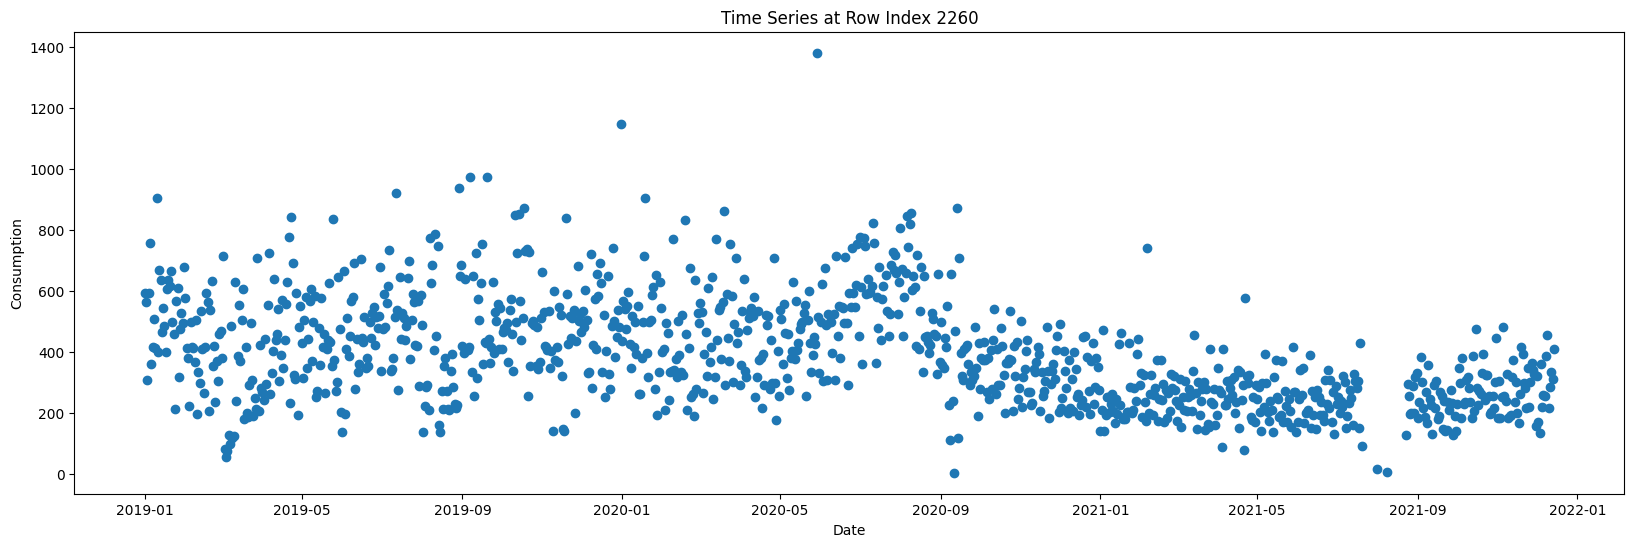

In [ ]:
plot_time_series(2260)

In [ ]:
#check nans and filter to get top 1000 least nans
nan_counts = transformed_df.isna().sum(axis=1)

sorted_df = transformed_df.loc[nan_counts.sort_values().index]
subset_df = sorted_df.iloc[:1000]
subset_df


FECHA,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14
ID_CONTADOR,,,,,,,,,,,,,,,,,,,,,
16353,146.0,397.0,372.0,430.0,259.0,320.0,440.0,300.0,485.0,258.0,...,230.0,395.0,256.0,202.0,376.0,218.0,168.0,286.0,290.0,226.0
16109,249.0,199.0,347.0,208.0,291.0,271.0,294.0,237.0,331.0,418.0,...,304.0,208.0,423.0,215.0,168.0,216.0,278.0,234.0,150.0,291.0
923,405.0,373.0,451.0,423.0,422.0,376.0,485.0,401.0,299.0,267.0,...,467.0,262.0,309.0,326.0,212.0,247.0,341.0,459.0,202.0,298.0
13308,294.0,533.0,296.0,342.0,198.0,169.0,730.0,108.0,607.0,247.0,...,471.0,307.0,500.0,325.0,361.0,187.0,244.0,526.0,381.0,273.0
15705,134.0,185.0,199.0,112.0,172.0,135.0,144.0,355.0,245.0,450.0,...,174.0,180.0,203.0,250.0,201.0,197.0,283.0,239.0,200.0,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,314.0,337.0,250.0,203.0,235.0,130.0,374.0,185.0,151.0,152.0,...,207.0,359.0,266.0,218.0,212.0,228.0,189.0,208.0,405.0,191.0
13028,214.0,175.0,207.0,223.0,266.0,153.0,212.0,241.0,227.0,218.0,...,250.0,139.0,89.0,249.0,168.0,298.0,162.0,175.0,195.0,230.0
2260,595.0,564.0,309.0,594.0,759.0,362.0,417.0,508.0,413.0,905.0,...,218.0,259.0,256.0,387.0,456.0,217.0,284.0,335.0,310.0,409.0


##Outlier removal visualization##

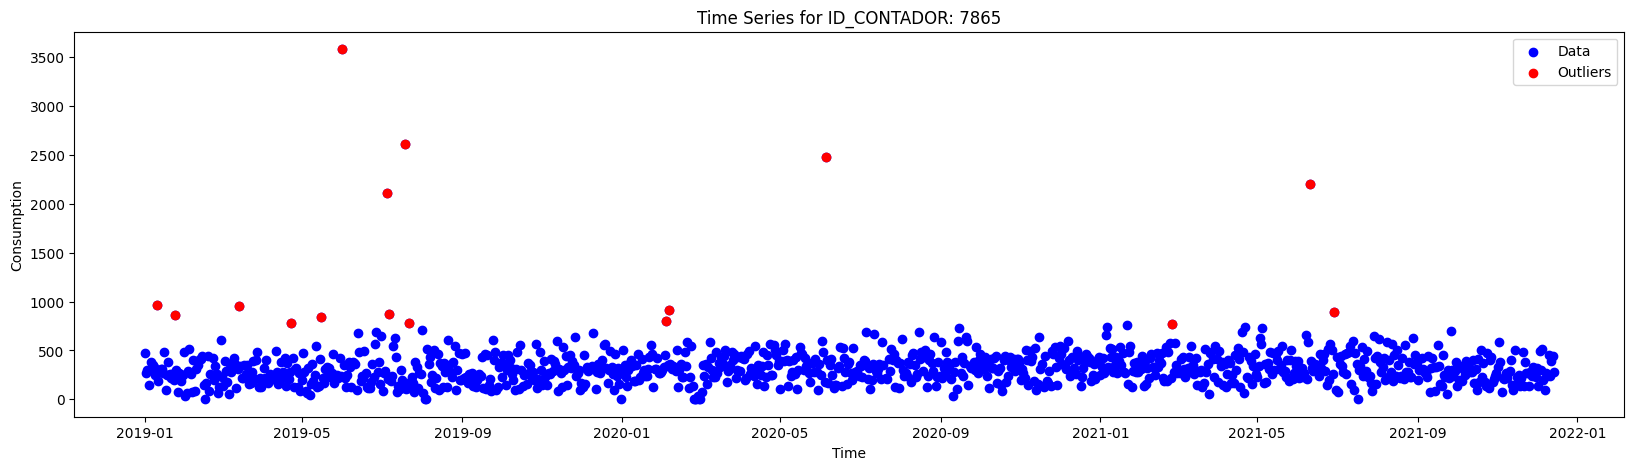

In [ ]:
def plot_outliers(df, id_contador):
    selected_row = df.loc[id_contador]

    row_mean = np.nanmean(selected_row)
    row_std = np.nanstd(selected_row)

    # Identify outliers based on the criteria
    outliers = (selected_row > row_mean + 2 * row_std) | (selected_row < 0)
    plt.figure(figsize=(20, 5))
    plt.scatter(selected_row.index, selected_row, color='blue', label='Data')
    plt.scatter(selected_row[outliers].index, selected_row[outliers], color='red', label='Outliers')

    plt.xlabel('Time')
    plt.ylabel('Consumption')
    plt.title(f'Time Series for ID_CONTADOR: {id_contador}')
    plt.legend()
    plt.show()

selected_id_contador = 7865
plot_outliers(subset_df, selected_id_contador)


In [ ]:
def clean_outliers(df):
    cleaned_df = df.copy()
    for index, row in cleaned_df.iterrows():
        row_mean = np.nanmean(row)
        row_std = np.nanstd(row)

        outliers = (row > row_mean + 2 * row_std) | (row < 0)
        cleaned_df.loc[index, outliers] = None

    return cleaned_df
cleaned_subset_df = clean_outliers(subset_df)
cleaned_subset_df

FECHA,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14
ID_CONTADOR,,,,,,,,,,,,,,,,,,,,,
16353,146.0,397.0,372.0,430.0,259.0,320.0,440.0,300.0,485.0,258.0,...,230.0,395.0,256.0,202.0,376.0,218.0,168.0,286.0,290.0,226.0
16109,249.0,199.0,347.0,208.0,291.0,271.0,294.0,237.0,331.0,418.0,...,304.0,208.0,NaN,215.0,168.0,216.0,278.0,234.0,150.0,291.0
923,405.0,373.0,451.0,423.0,422.0,376.0,485.0,401.0,299.0,267.0,...,467.0,262.0,309.0,326.0,212.0,247.0,341.0,459.0,202.0,298.0
13308,294.0,533.0,296.0,342.0,198.0,169.0,NaN,108.0,607.0,247.0,...,471.0,307.0,500.0,325.0,361.0,187.0,244.0,526.0,381.0,273.0
15705,134.0,185.0,199.0,112.0,172.0,135.0,144.0,NaN,245.0,NaN,...,174.0,180.0,203.0,250.0,201.0,197.0,283.0,239.0,200.0,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,314.0,337.0,250.0,203.0,235.0,130.0,374.0,185.0,151.0,152.0,...,207.0,359.0,266.0,218.0,212.0,228.0,189.0,208.0,405.0,191.0
13028,214.0,175.0,207.0,223.0,266.0,153.0,212.0,241.0,227.0,218.0,...,250.0,139.0,89.0,249.0,168.0,298.0,162.0,175.0,195.0,230.0
2260,595.0,564.0,309.0,594.0,NaN,362.0,417.0,508.0,413.0,NaN,...,218.0,259.0,256.0,387.0,456.0,217.0,284.0,335.0,310.0,409.0


##Fill NaN Values with 4pt smoothing median

In [ ]:
is_estimated = cleaned_subset_df.isna().astype(int)
is_estimated

FECHA,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14
ID_CONTADOR,,,,,,,,,,,,,,,,,,,,,
16353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16109,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13308,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15705,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2260,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

filled_subset_df = cleaned_subset_df.copy()
for index, row in filled_subset_df.iterrows():
    moving_median = row.rolling(window=4, min_periods=1).median()
    filled_subset_df.loc[index] = row.fillna(moving_median)

filled_subset_df


FECHA,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14
ID_CONTADOR,,,,,,,,,,,,,,,,,,,,,
16353,146.0,397.0,372.0,430.0,259.0,320.0,440.0,300.0,485.0,258.0,...,230.0,395.0,256.0,202.0,376.0,218.0,168.0,286.0,290.0,226.0
16109,249.0,199.0,347.0,208.0,291.0,271.0,294.0,237.0,331.0,418.0,...,304.0,208.0,304.0,215.0,168.0,216.0,278.0,234.0,150.0,291.0
923,405.0,373.0,451.0,423.0,422.0,376.0,485.0,401.0,299.0,267.0,...,467.0,262.0,309.0,326.0,212.0,247.0,341.0,459.0,202.0,298.0
13308,294.0,533.0,296.0,342.0,198.0,169.0,198.0,108.0,607.0,247.0,...,471.0,307.0,500.0,325.0,361.0,187.0,244.0,526.0,381.0,273.0
15705,134.0,185.0,199.0,112.0,172.0,135.0,144.0,144.0,245.0,194.5,...,174.0,180.0,203.0,250.0,201.0,197.0,283.0,239.0,200.0,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,314.0,337.0,250.0,203.0,235.0,130.0,374.0,185.0,151.0,152.0,...,207.0,359.0,266.0,218.0,212.0,228.0,189.0,208.0,405.0,191.0
13028,214.0,175.0,207.0,223.0,266.0,153.0,212.0,241.0,227.0,218.0,...,250.0,139.0,89.0,249.0,168.0,298.0,162.0,175.0,195.0,230.0
2260,595.0,564.0,309.0,594.0,564.0,362.0,417.0,508.0,413.0,417.0,...,218.0,259.0,256.0,387.0,456.0,217.0,284.0,335.0,310.0,409.0


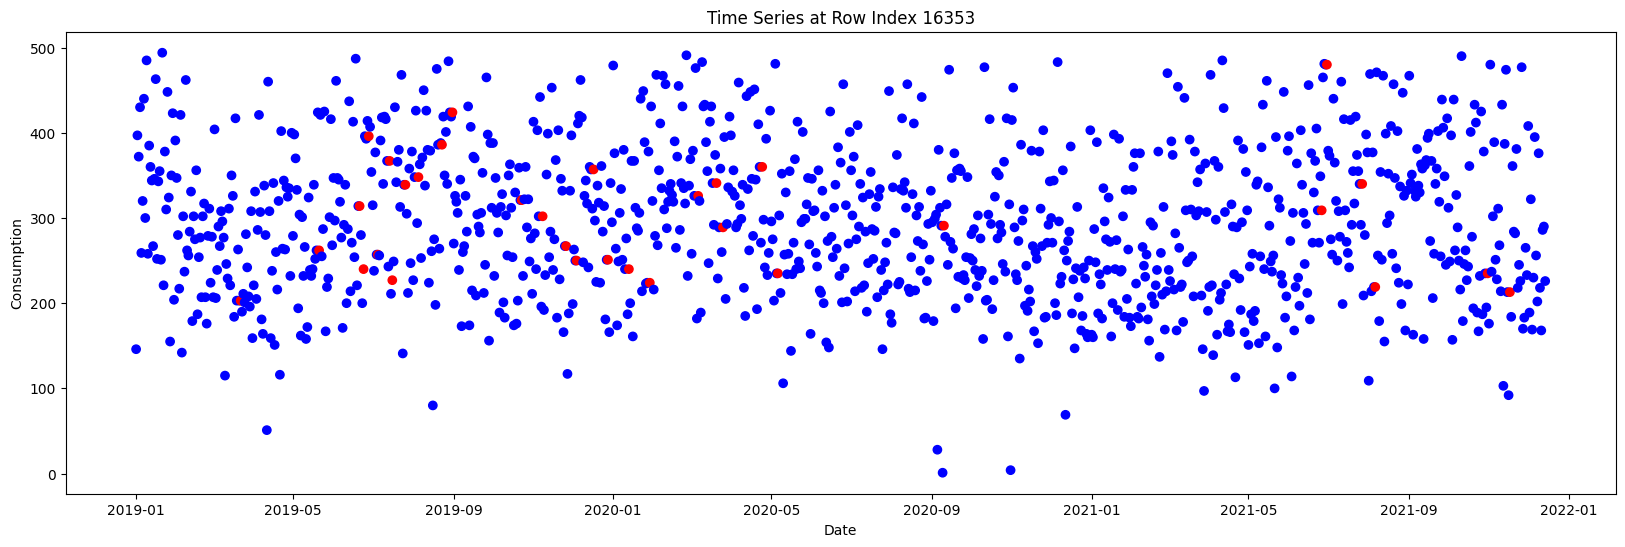

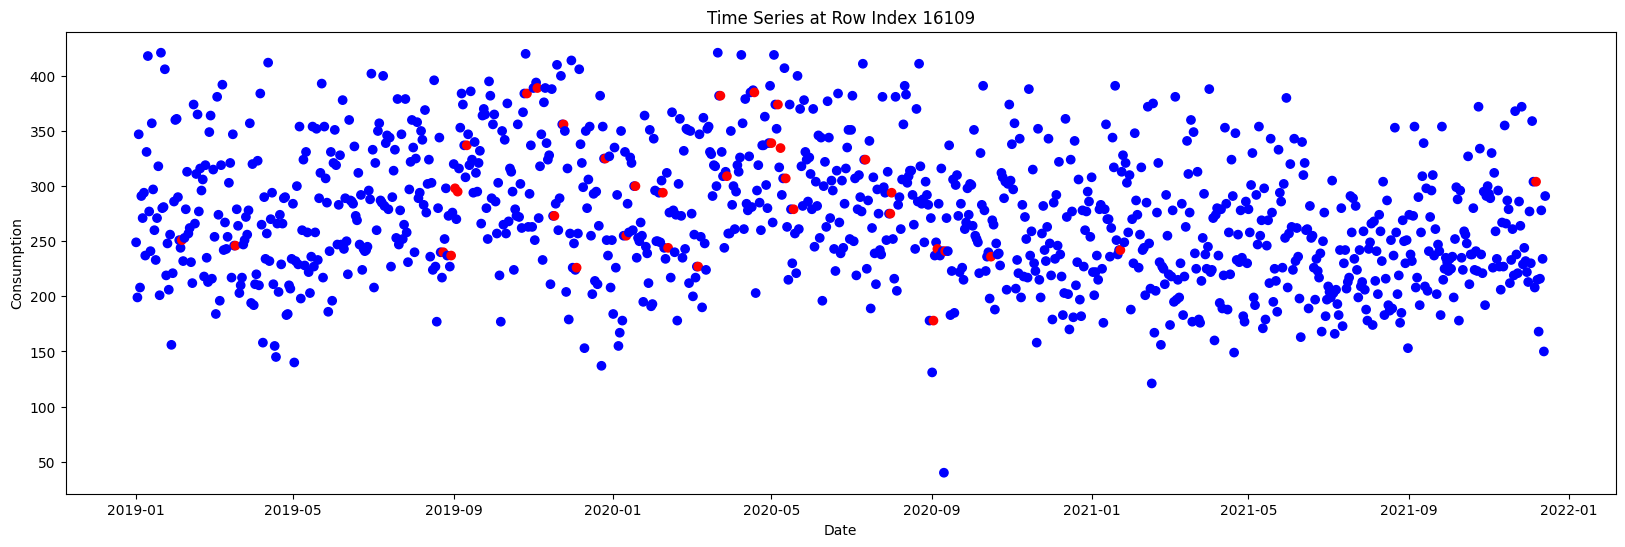

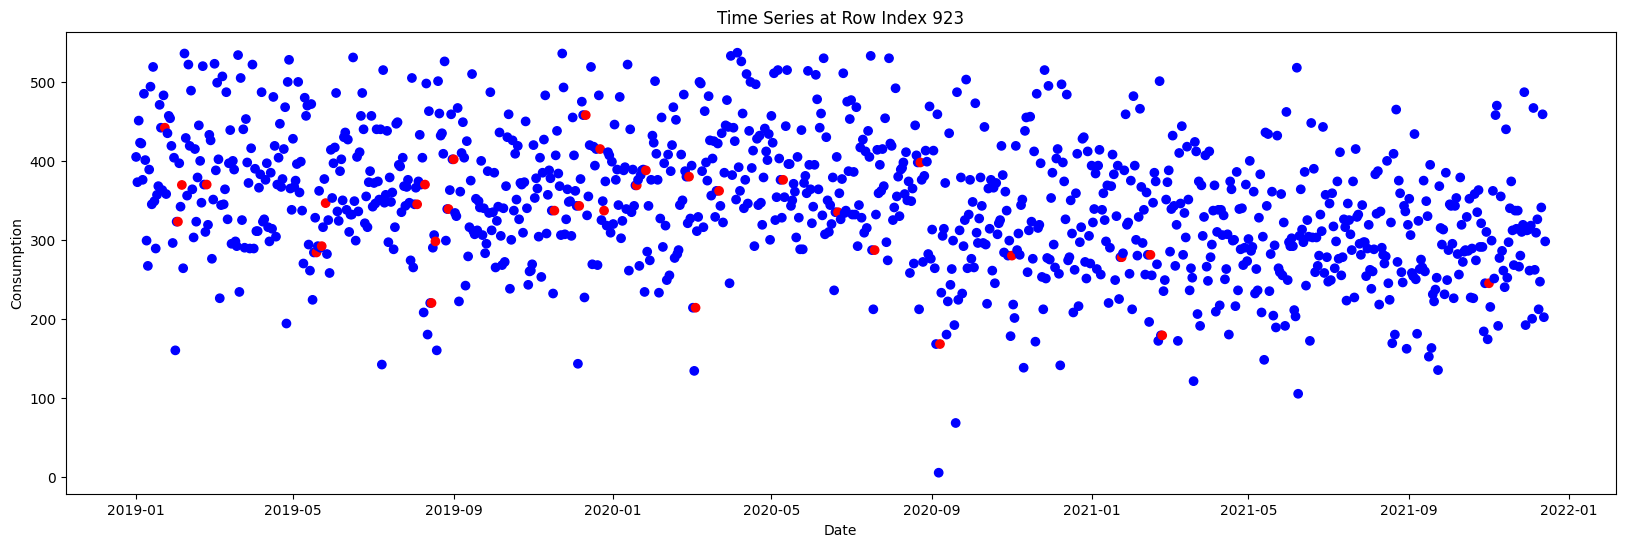

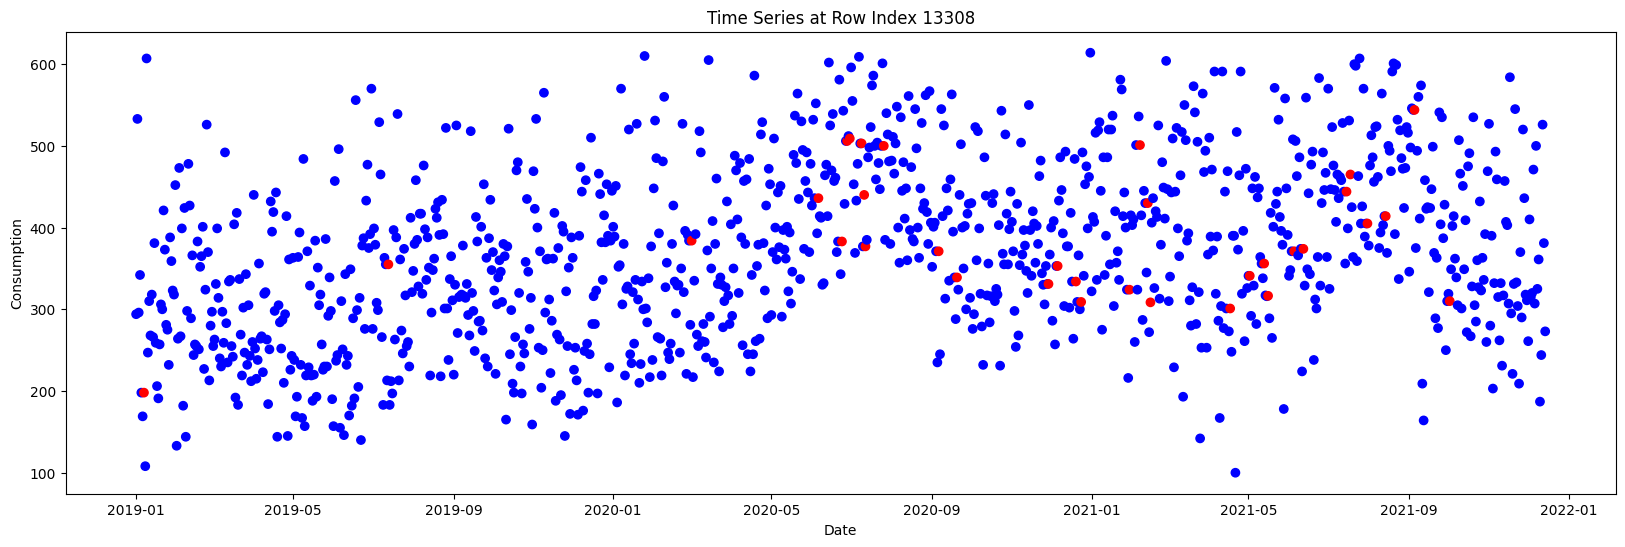

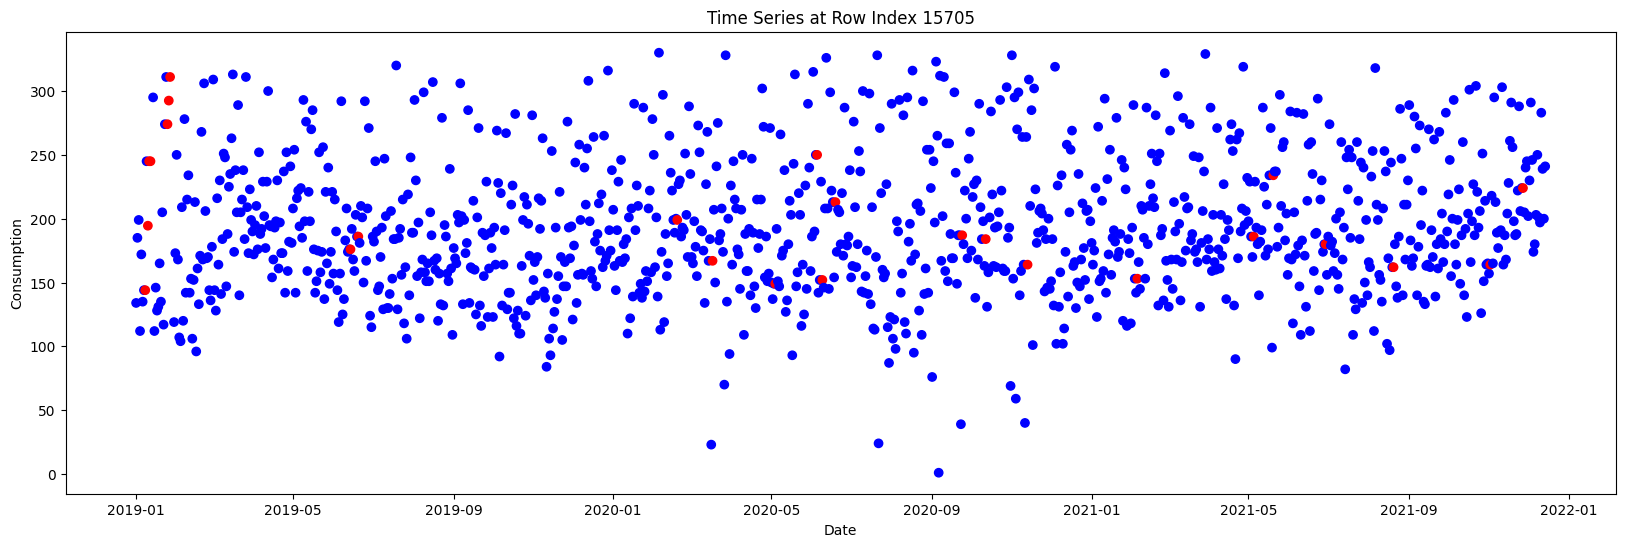

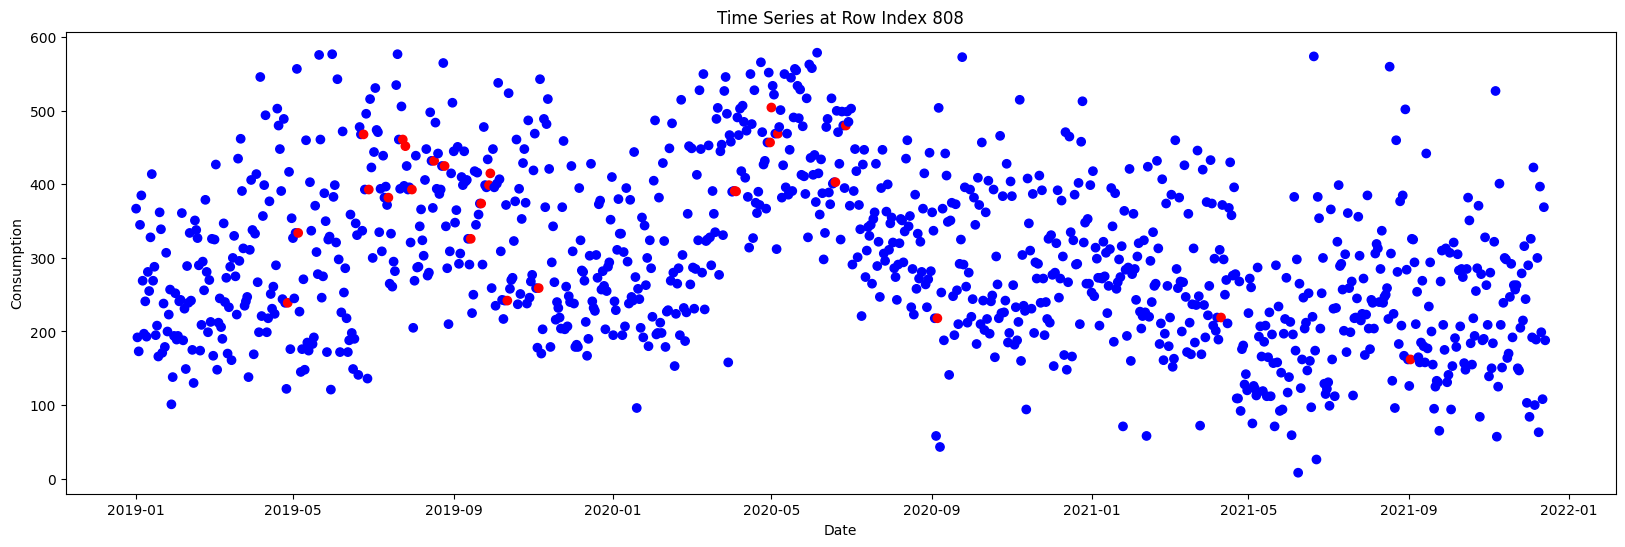

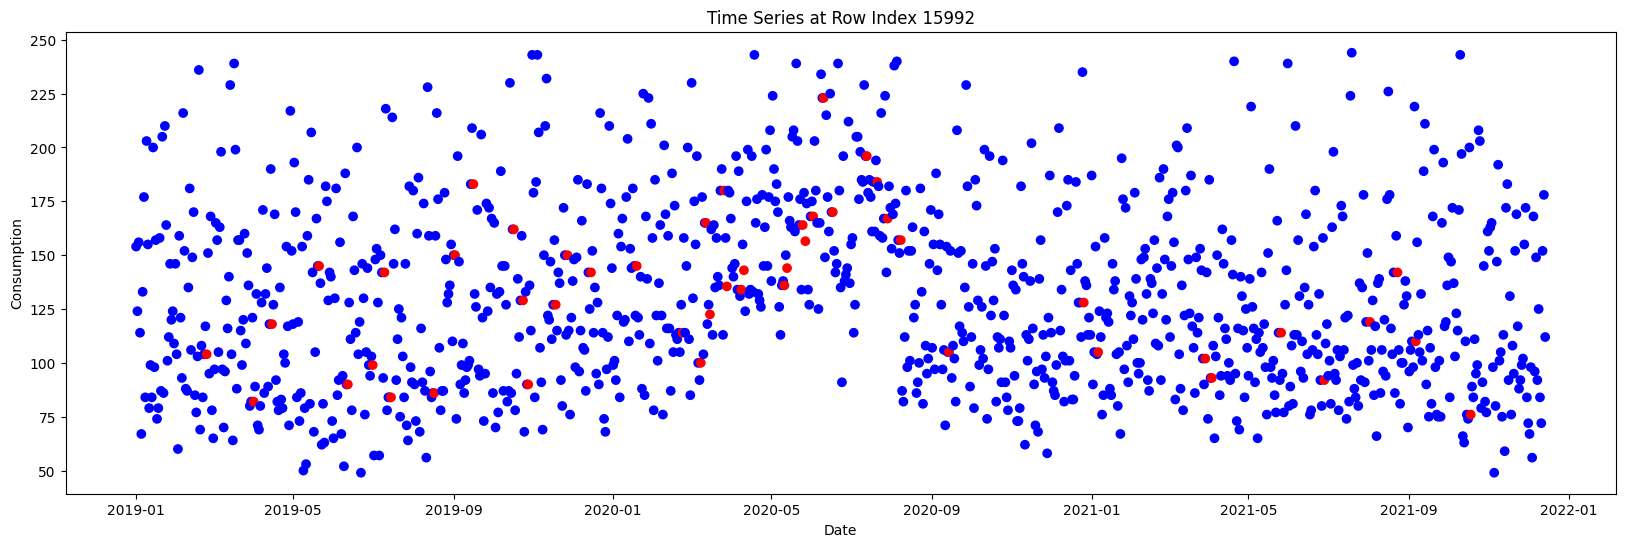

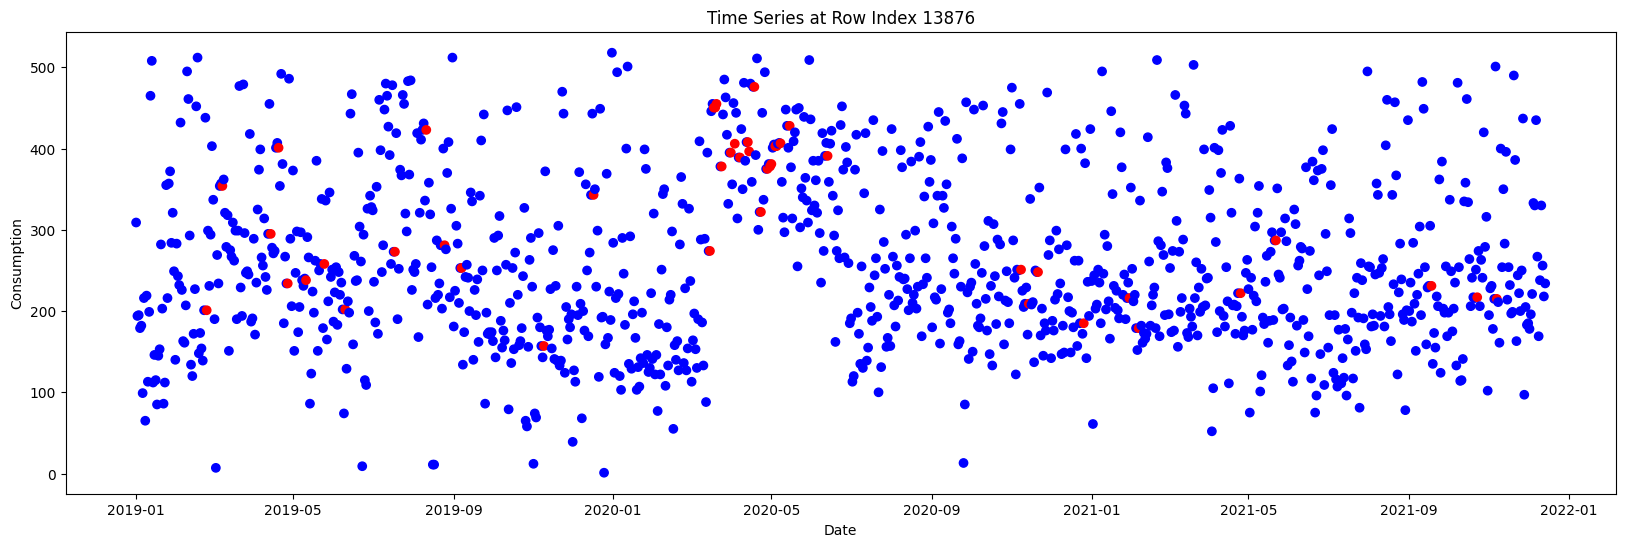

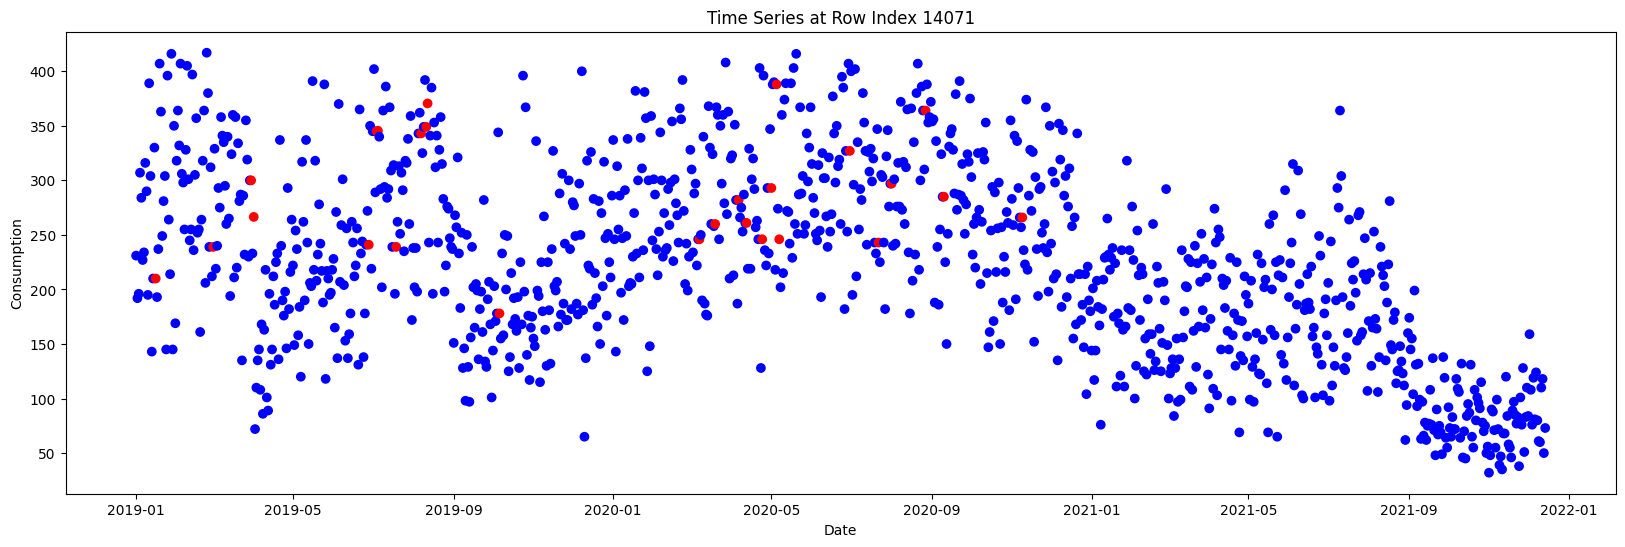

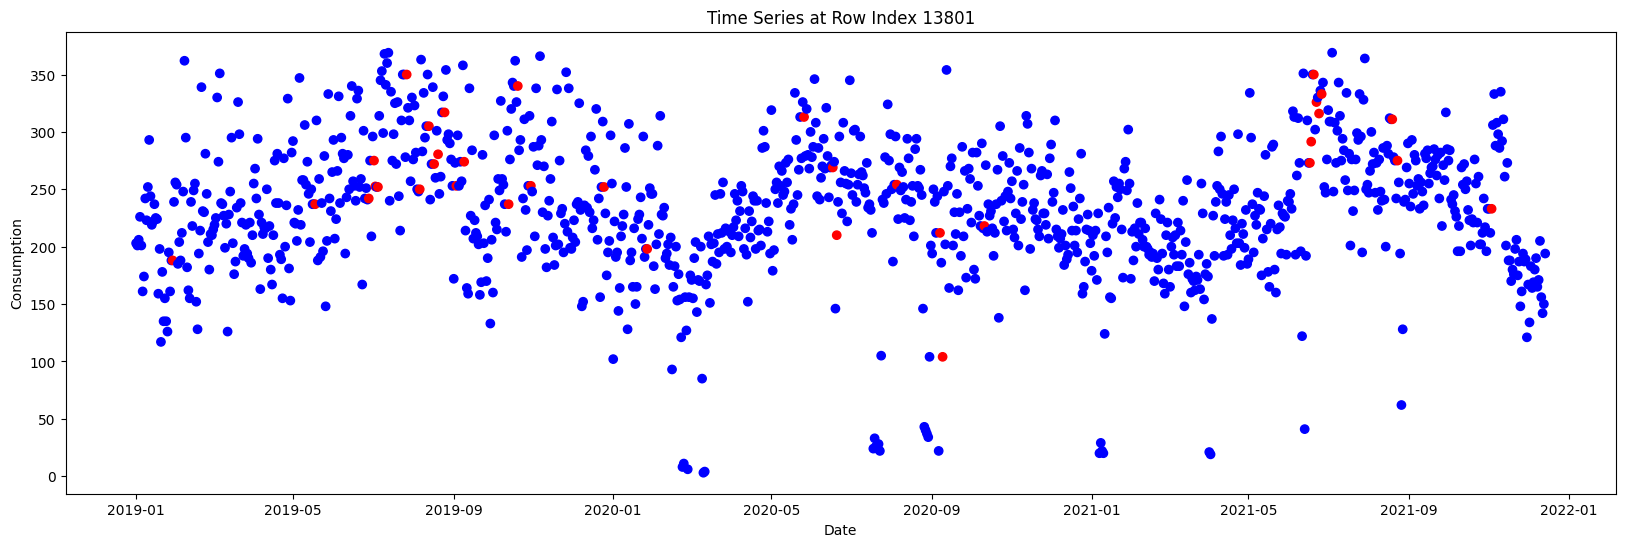

In [ ]:
def plot_time_series_estimated(index):
    selected_row =filled_subset_df.loc[index]
    dates = filled_subset_df.columns[filled_subset_df.columns != 'ID_CONTADOR']
    consumption = selected_row[dates]

    is_estimated_row = is_estimated.loc[index]
    colors = ['red' if value == 1 else 'blue' for value in is_estimated_row]

    plt.figure(figsize=(20, 6))
    plt.scatter(dates, consumption, c=colors)
    plt.xlabel('Date')
    plt.ylabel('Consumption')
    plt.title(f'Time Series at Row Index {index}')
    plt.show()

for id_contador in filled_subset_df.index.values[0:10]:
  plot_time_series_estimated(id_contador)


##Clustering user patterns

In [ ]:
filled_subset_df.isnull().sum()

FECHA
2019-01-01    68
2019-01-02    24
2019-01-03    17
2019-01-04    16
2019-01-05    16
              ..
2021-12-10     8
2021-12-11     8
2021-12-12     8
2021-12-13     7
2021-12-14     9
Length: 1079, dtype: int64

In [ ]:
filled_subset_df = filled_subset_df.fillna(filled_subset_df.mean())


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

consumption_data = filled_subset_df.transpose()
scaler = StandardScaler()
normalized_data = scaler.fit_transform(consumption_data)
min_clusters = 2
max_clusters = 10
best_silhouette_score = -1
best_num_clusters = min_clusters

for n_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_data)
    silhouette_avg = silhouette_score(normalized_data, cluster_labels)
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_num_clusters = n_clusters

best_num_clusters

3

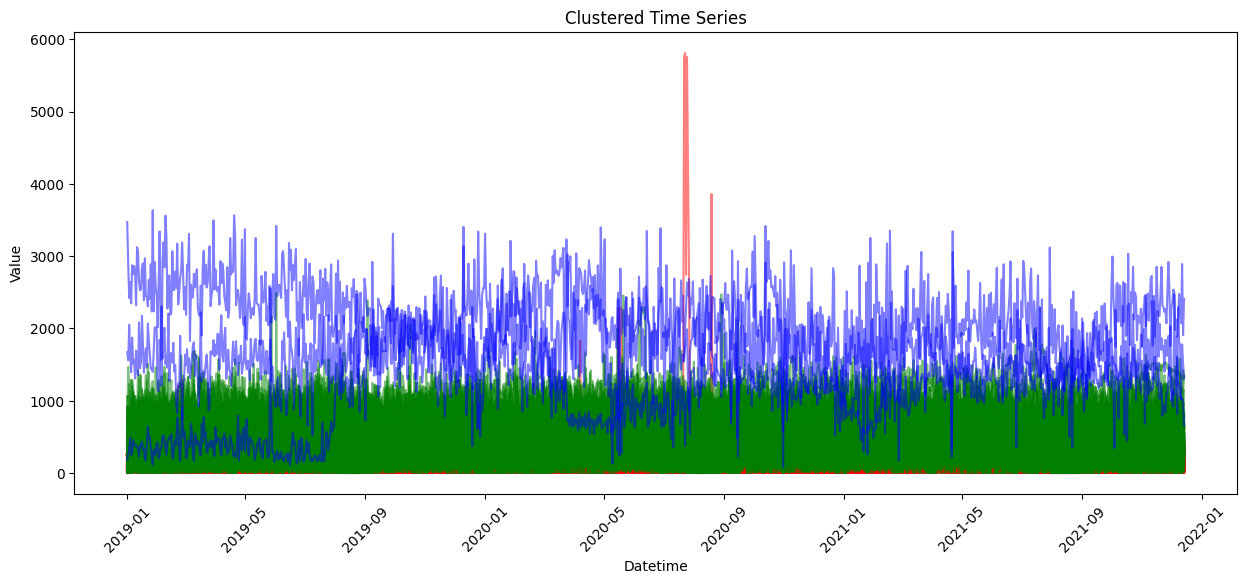

In [ ]:

time_series_data = filled_subset_df.values

datetimes = filled_subset_df.columns.tolist()

# Apply K-means clustering to find clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(time_series_data)

# Plot the clusters
plt.figure(figsize=(15, 6))

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'][:num_clusters]

# Iterate over each cluster and plot the time series for users in that cluster
for cluster_label in range(num_clusters):
    cluster_indices = np.where(clusters == cluster_label)[0]
    cluster_data = time_series_data[cluster_indices]

    # Plot the time series for each user in the cluster
    for user_data in cluster_data:
        plt.plot(datetimes, user_data, color=colors[cluster_label], alpha=0.5)

plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Clustered Time Series')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Compute the silhouette score
silhouette_avg = silhouette_score(time_series_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Compute the Calinski-Harabasz index
calinski_harabasz_index = calinski_harabasz_score(time_series_data, clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")

# Compute the Davies-Bouldin index
davies_bouldin_index = davies_bouldin_score(time_series_data, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")


Silhouette Score: 0.3231042187968301
Calinski-Harabasz Index: 371.3974648136076
Davies-Bouldin Index: 1.0782382283317888


In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalized_df = filled_subset_df.copy()

# Iterate over each user
for user in normalized_df.index:
    # Extract the data for the current user
    user_data = normalized_df.loc[user].values.reshape(-1, 1)

    # Apply min-max normalization to the user data
    scaler = MinMaxScaler(feature_range=(0, 1))  # Set feature range to (0, 1)
    normalized_data = scaler.fit_transform(user_data)

    # Update the DataFrame with the normalized data for the current user
    normalized_df.loc[user] = normalized_data.flatten()

# The data for each user in `filled_subset_df` has been normalized between 0 and 1 and stored in `normalized_df`


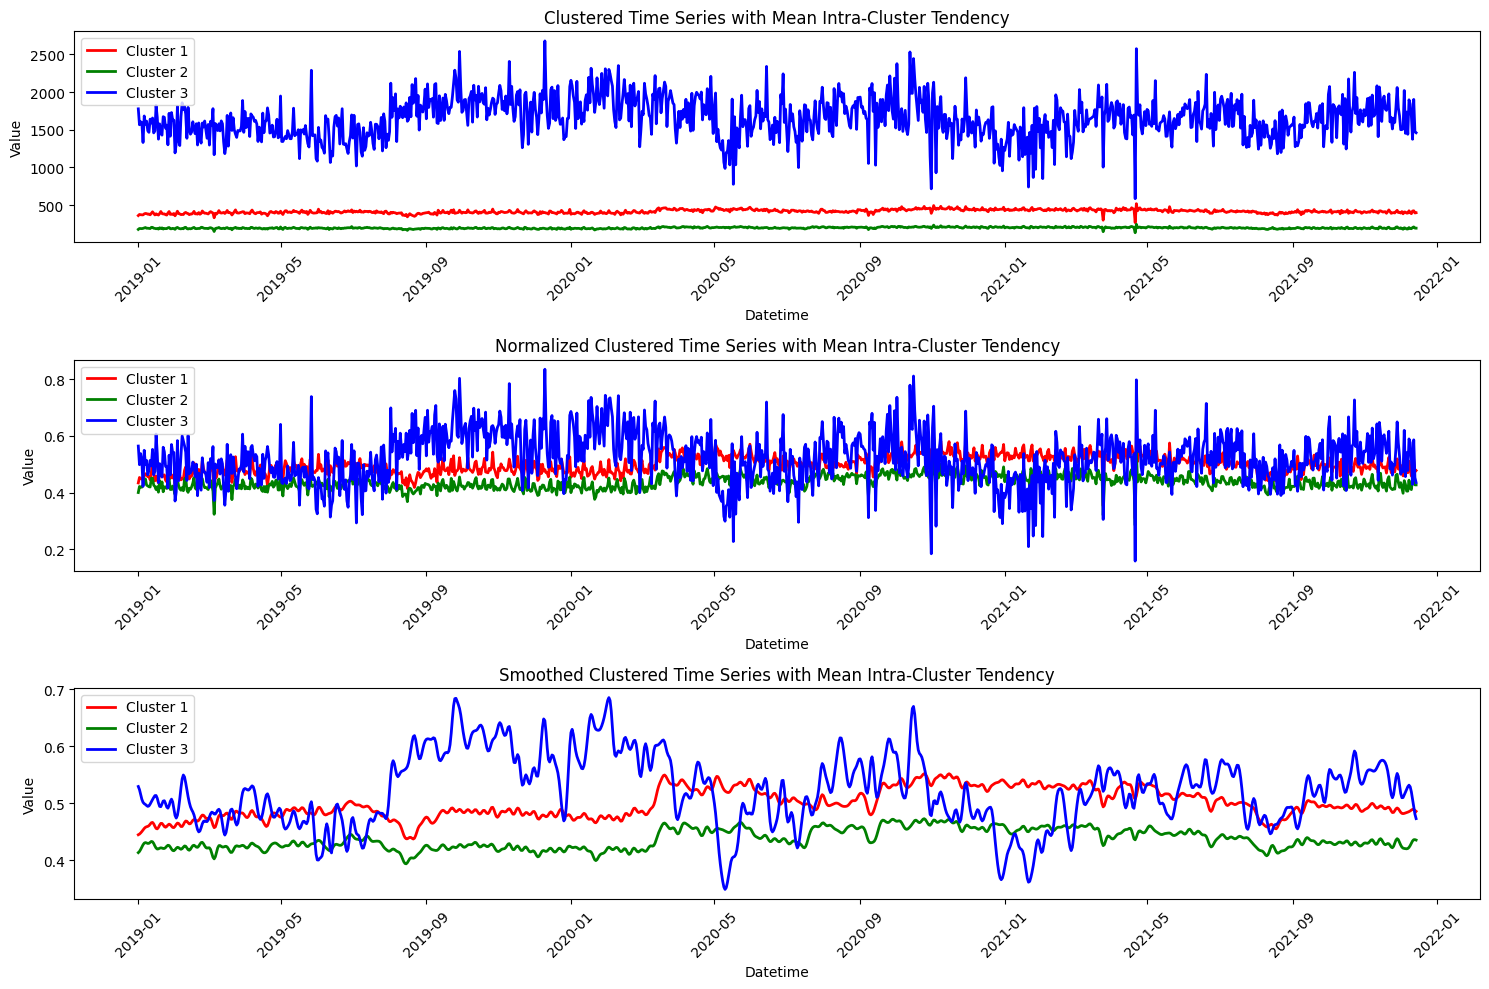

In [ ]:
from scipy.ndimage.filters import gaussian_filter1d

time_series_data = filled_subset_df.values
time_series_data_norm = normalized_df.values

datetimes = filled_subset_df.columns.tolist()

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(time_series_data)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10))

for cluster_label in range(num_clusters):
    cluster_indices = np.where(clusters == cluster_label)[0]
    cluster_data = time_series_data[cluster_indices]
    cluster_data_norm = time_series_data_norm[cluster_indices]

    # Calculate the mean intra-cluster tendency
    mean_tendency = np.mean(cluster_data, axis=0)
    mean_tendency_norm = np.mean(cluster_data_norm, axis=0)
    mean_tendency_smooth = gaussian_filter1d(mean_tendency_norm, sigma=2)

    # Plot the mean intra-cluster tendency line
    ax1.plot(datetimes, mean_tendency, color=colors[cluster_label], linewidth=2, label='Cluster ' + str(cluster_label + 1))
    ax2.plot(datetimes, mean_tendency_norm, color=colors[cluster_label], linewidth=2, label='Cluster ' + str(cluster_label + 1))
    ax3.plot(datetimes, mean_tendency_smooth, color=colors[cluster_label], linewidth=2, label='Cluster ' + str(cluster_label + 1))


ax1.set_xlabel('Datetime')
ax1.set_ylabel('Value')
ax1.set_title('Clustered Time Series with Mean Intra-Cluster Tendency')
ax1.legend(loc='best')
ax1.tick_params(axis='x', rotation=45)

ax2.set_xlabel('Datetime')
ax2.set_ylabel('Value')
ax2.set_title('Normalized Clustered Time Series with Mean Intra-Cluster Tendency')
ax2.legend(loc='best')
ax2.tick_params(axis='x', rotation=45)

ax3.set_xlabel('Datetime')
ax3.set_ylabel('Value')
ax3.set_title('Smoothed Clustered Time Series with Mean Intra-Cluster Tendency')
ax3.legend(loc='best')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


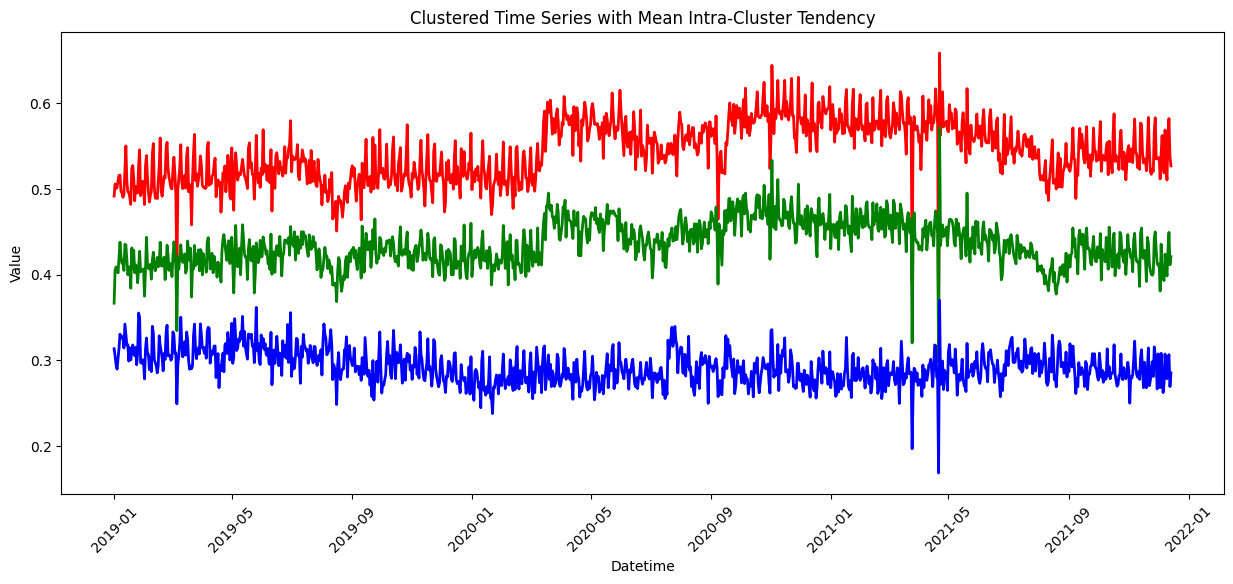

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

time_series_data = normalized_df.values
datetimes = filled_subset_df.columns.tolist()

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(time_series_data)

plt.figure(figsize=(15, 6))

colors = ['r', 'g', 'b', 'g', 'g', 'y', 'k'][:num_clusters]

for cluster_label in range(num_clusters):
    cluster_indices = np.where(clusters == cluster_label)[0]
    cluster_data = time_series_data[cluster_indices]

    mean_tendency = np.mean(cluster_data, axis=0)

    plt.plot(datetimes, mean_tendency, color=colors[cluster_label], linewidth=2)

plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Clustered Time Series with Mean Intra-Cluster Tendency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


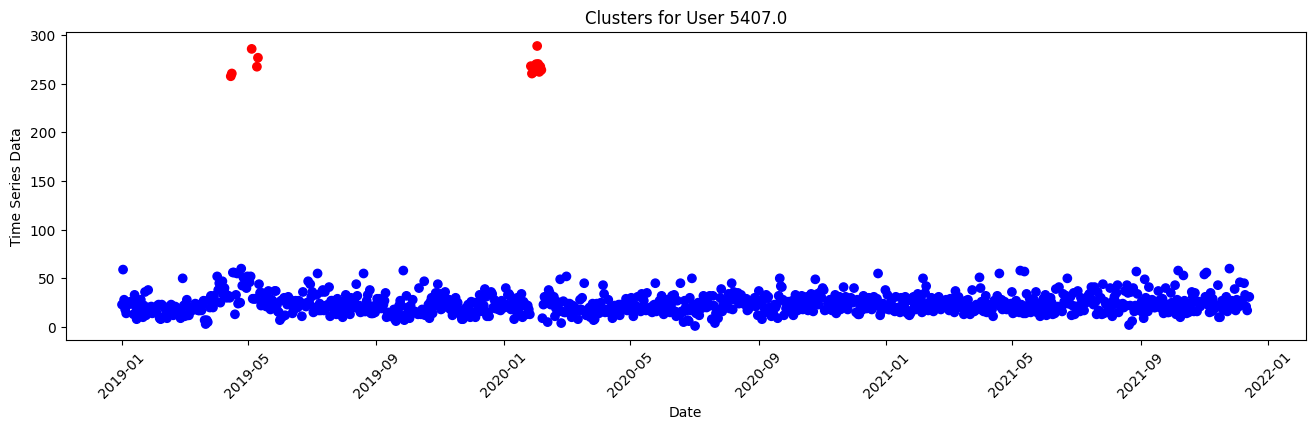

User 5407.0:
Silhouette Score: 0.956497888502185
Calinski-Harabasz Index: 9982.138937343605
Davies-Bouldin Index: 0.055816352655134197




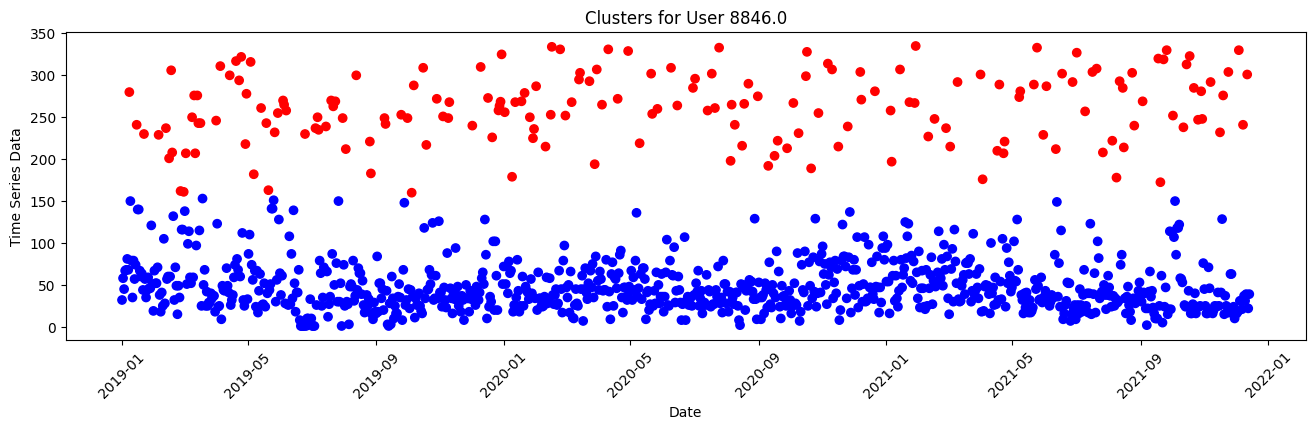

User 8846.0:
Silhouette Score: 0.8259430093531706
Calinski-Harabasz Index: 6971.506768527399
Davies-Bouldin Index: 0.2638561871773207




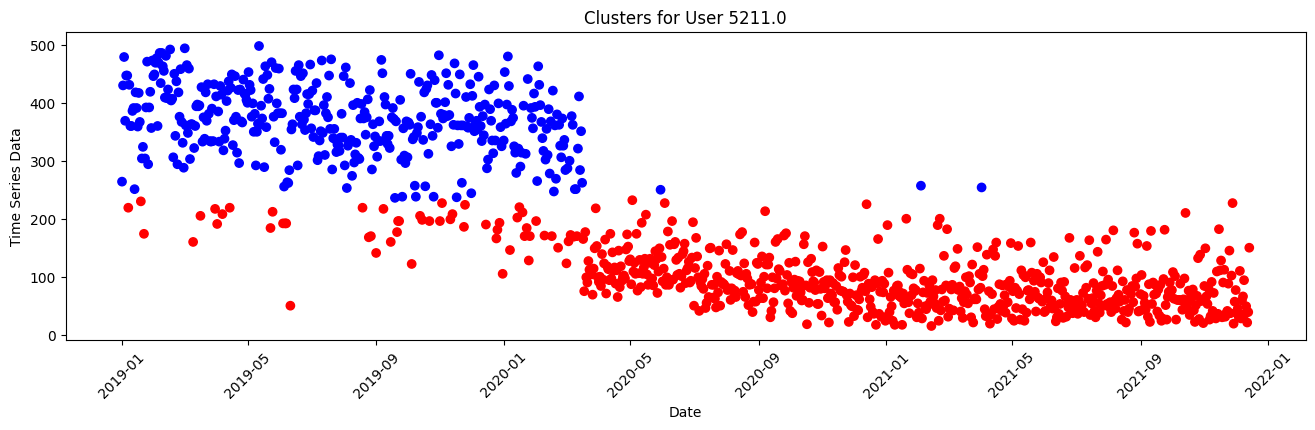

User 5211.0:
Silhouette Score: 0.7660192426336686
Calinski-Harabasz Index: 6848.308290937788
Davies-Bouldin Index: 0.3119788399679873




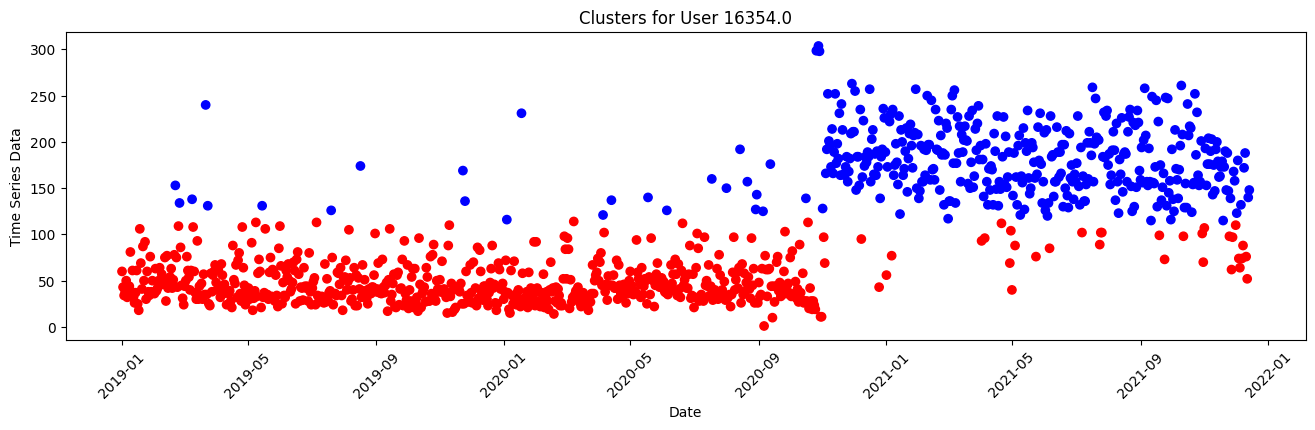

User 16354.0:
Silhouette Score: 0.7496116634934954
Calinski-Harabasz Index: 5568.696791633536
Davies-Bouldin Index: 0.354909216478139




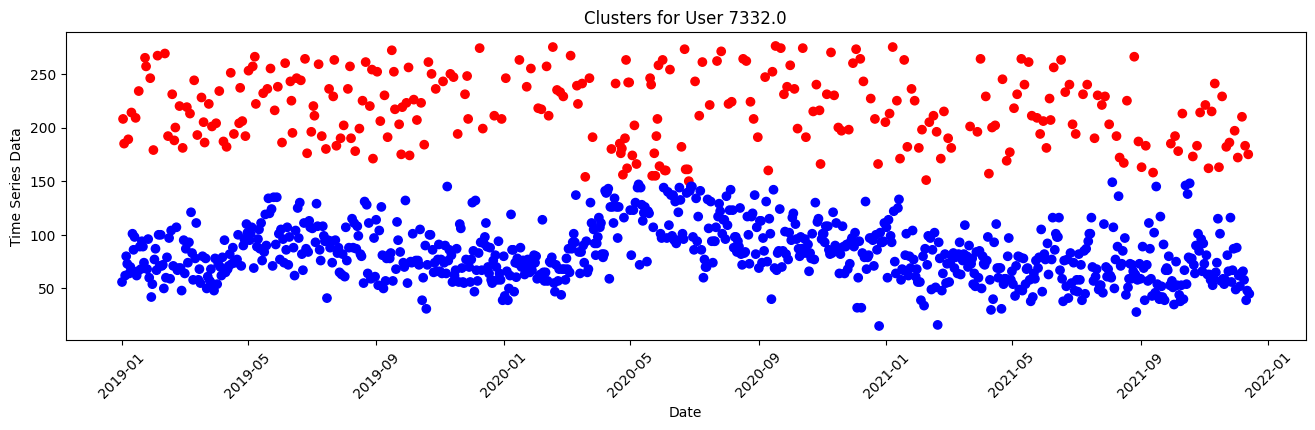

User 7332.0:
Silhouette Score: 0.7477191215252745
Calinski-Harabasz Index: 4974.039872104436
Davies-Bouldin Index: 0.3598895137756271




In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

results_df = pd.DataFrame(columns=['User', 'Calinski_Harabasz_Score'])

for index, row in filled_subset_df.iterrows():
    user_data = np.array(row).reshape(-1, 1)

    kmeans = KMeans(n_clusters=2)
    cluster_labels = kmeans.fit_predict(user_data)

    ch_score = calinski_harabasz_score(user_data, cluster_labels)

    results_df = results_df.append({'User': index, 'Calinski_Harabasz_Score': ch_score}, ignore_index=True)

results_df = results_df.sort_values(by='Calinski_Harabasz_Score', ascending=False)
top_users = results_df.head(5)['User'].tolist()

for user in top_users:
    user_data = np.array(filled_subset_df.loc[user]).reshape(-1, 1)
    kmeans = KMeans(n_clusters=2)
    cluster_labels = kmeans.fit_predict(user_data)

    dates = filled_subset_df.columns.tolist()

    plt.figure(figsize=(16,4))
    plt.scatter(dates, user_data, c=cluster_labels, cmap='bwr')
    plt.xlabel('Date')
    plt.ylabel('Time Series Data')
    plt.title(f'Clusters for User {user}')
    plt.xticks(rotation=45)
    plt.show()

    # Compute the evaluation metrics for the clusters
    silhouette_avg = silhouette_score(user_data, cluster_labels)
    calinski_harabasz_index = calinski_harabasz_score(user_data, cluster_labels)
    davies_bouldin_index = davies_bouldin_score(user_data, cluster_labels)

    # Print the evaluation metrics for the clusters
    print(f"User {user}:")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_index}")
    print(f"Davies-Bouldin Index: {davies_bouldin_index}")
    print("\n")
